Import Modules <br>
<br>
Could not run epochs greater than 500. It crashed my computer.<br>
Predicted Values:<br>
[[0.09931874]<br>
 [0.2634384 ]<br>
 [0.2872721 ]<br>
 [0.5665953 ]]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

data: (4, 2)
class: (4,)


Load and split data, then check the number of data

In [ ]:
dat = np.loadtxt('./and.csv', delimiter=',', skiprows=1)
data_train = dat[:, :-1] # Extract all columns except the last one (2d)
class_train = dat[:, -1] # Extract the last one column only (1d)
print('data:', data_train.shape)
print('class:', class_train.shape)

Model building and learning

In [3]:
# Had to change epochs to 500, 1000 crashed both my laptop and my PC
model = keras.models.Sequential()
                        # 1 Neuron  # Input is 2d, activation function is sigmoid function
model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
fit_log = model.fit(data_train, class_train, epochs=500, batch_size=1)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7791 - accuracy: 0.5000
Epoch 2/500
4/4 [==============================] - 0s 665us/step - loss: 0.7715 - accuracy: 0.5000
Epoch 3/500
4/4 [==============================] - 0s 665us/step - loss: 0.7641 - accuracy: 0.5000
Epoch 4/500
4/4 [==============================] - 0s 997us/step - loss: 0.7569 - accuracy: 0.5000
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7498 - accuracy: 0.5000
Epoch 6/500
4/4 [==============================] - 0s 997us/step - loss: 0.7429 - accuracy: 0.5000
Epoch 7/500
4/4 [==============================] - 0s 997us/step - loss: 0.7361 - accuracy: 0.5000
Epoch 8/500
4/4 [==============================] - 0s 665us/step - loss: 0.7295 - accuracy: 0.5000
Epoch 9/500
4/4 [==============================] - 0s 987us/step - loss: 0.7231 - accuracy: 0.5000
Epoch 10/500
4/4 [==============================] - 0s 998us/step - loss: 0.7168 - accuracy: 0.5000
Epoch 11/500


Graph for accuracy

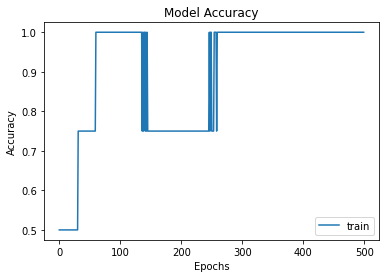

In [4]:
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Find the predicted value for the training data

In [5]:
pred = model.predict(data_train)
print(pred)

[[0.09931874]
 [0.2634384 ]
 [0.2872721 ]
 [0.5665953 ]]


Prepare to draw a separating hyperplane:teaching signal

In [7]:
t1 = data_train[class_train==1]
t0 = data_train[class_train==0]
t1_x = t1[:,0] # X-coordinate of a point(teaching signal of 1)
t1_y = t1[:,1] # Y-coordinate of a point(teaching signal of 1)
t0_x = t0[:,0] # X-coordinate of a point(teaching signal of 0)
t0_y = t0[:,1] # Y-coordinate of a point(teaching signal of 0)

Prepare to draw a separating hyperplane: grid points

In [10]:
g = np.loadtxt('./grid01_21x21.csv', delimiter=',')
pred_g = model.predict(g)[:,0]
g1 = g[pred_g>=0.5] # Predicted value (>=0.5) belongs to 1
g0 = g[pred_g<0.5]  # Predicted value (<0.5) belongs to 0
g1_x = g1[:,0] # X-coordinate of predicted points belongs to 1
g1_y = g1[:,1] # Y-coordinate of predicted points belongs to 1
g0_x = g0[:,0] # X-coordinate of predicted points belongs to 0
g0_y = g0[:,1] # Y-coordinate of predicted points belongs to 0

Draw a separating hyperplane

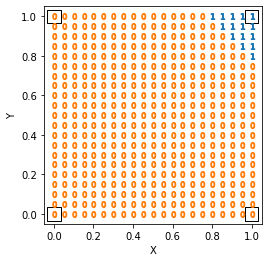

In [11]:
plt.scatter(t1_x, t1_y, marker='s',facecolors='none',edgecolors='black',s=180)
plt.scatter(t0_x, t0_y, marker='s',facecolors='none',edgecolors='black',s=180)
plt.scatter(g1_x,g1_y,marker='$1$')
plt.scatter(g0_x,g0_y,marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()